In [40]:
import numpy as np 
import gym 
import time 
import math 
import matplotlib.pyplot as plt 

In [41]:
env = gym.make("CartPole-v1")
print(env.action_space.n)

2


In [42]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 1

epsilon_decay_value = 0.99995

The Q_table basically contains an approximation of the cart position, cart velocity, pole position, pole velocity, and 2 possible actions <br>
Since pole position and velocity are more important, there are more values possible for them

In [43]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

Range of valid positions : -4.8 to 4.8 <br>
Range of valid velocities : -inf to inf <br>
Range of valid angles : -0.418 to 0.418 <br>
Range of valid angular velocities : -inf to inf <br>
<br>
However, episode terminates if position goes out of -2,4 to 2.4, or angle goes out of -0.2095 to 0.2095

In [44]:
def discretize(state):
    # Discretize the first value from [-4.8, 4.8] to [0, 29]
    scaled_value1 = int(((state[0] + 4.8) / (4.8 + 4.8)) * 29)
    
    # Discretize the second value from [-inf, inf] to [0, 29]
    scaled_value2 = int(((np.tanh(state[1]) + 1) / 2) * 29)
    
    # Discretize the third value from [-0.418, 0.418] to [0, 49]
    scaled_value3 = int(((state[2] + 0.418) / (0.418 + 0.418)) * 49)
    
    # Discretize the fourth value from [-inf, inf] to [0, 49]
    scaled_value4 = int(((np.tanh(state[3]) + 1) / 2) * 49)
    
    return tuple([scaled_value1, scaled_value2, scaled_value3, scaled_value4])

Episode: 0
Time Average: 2.3834705352783203e-06
Mean Reward: 0.028


/home/ssddevavrat/anaconda3/envs/ML_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/ssddevavrat/anaconda3/envs/ML_env/lib/python3.12/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Episode: 2000
Time Average: 0.0015032672882080078
Mean Reward: 44.317
Episode: 4000
Time Average: 0.001552144765853882
Mean Reward: 45.18
Episode: 6000
Time Average: 0.001453418731689453
Mean Reward: 44.529
Episode: 8000
Time Average: 0.001447343111038208
Mean Reward: 44.971
Episode: 10000
Time Average: 0.0014135017395019531
Mean Reward: 43.557
Epsilon: 0.9512282354250458
Episode: 12000
Epsilon: 0.9048351558698463
Time Average: 0.0014719338417053223
Mean Reward: 45.362
Epsilon: 0.8607047486686201
Epsilon: 0.8394533480303666
Episode: 14000
Epsilon: 0.818726659298009
Time Average: 0.0017218685150146484
Mean Reward: 48.247
Epsilon: 0.7787959154194878
Epsilon: 0.7595669010105212
Episode: 16000
Epsilon: 0.7408126643807126
Time Average: 0.0017523903846740723
Mean Reward: 52.307
Epsilon: 0.7225214829355084
Epsilon: 0.7046819235193919
Epsilon: 0.687282835269431
Episode: 18000
Epsilon: 0.6703133426452782
Time Average: 0.0018931689262390136
Mean Reward: 56.172
Epsilon: 0.6537628386312633
Epsilon

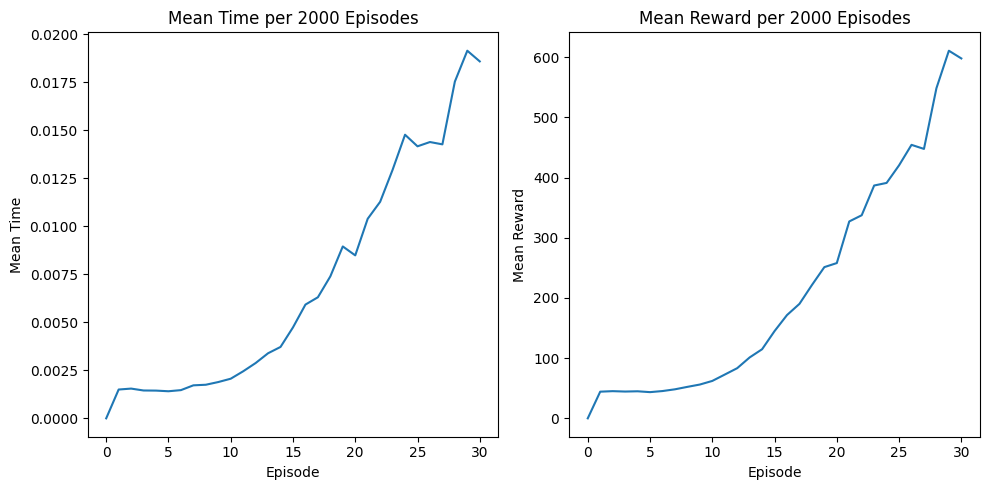

In [45]:
mean_values = []
mean_reward_values = []

for episode in range(EPISODES + 1):
    t0 = time.time() 
    discrete_state = discretize(env.reset()[0])
    done = False
    episode_reward = 0 

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state]) 
        else:
            action = np.random.randint(0, env.action_space.n) 

        new_state, reward, done, _, _ = env.step(action) 
        episode_reward += reward 
        new_discrete_state = discretize(new_state)
        
        # if episode % 2000 == 0: #render
        #     env.render()

        if not done: #update q-table
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: #epsilon modification
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)
            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 #episode total time
    total = total + episode_total

    total_reward += episode_reward #episode total reward
    prior_reward = episode_reward

    if episode % 2000 == 0: 
        mean = total / 1000
        mean_values.append(mean)
        print("Time Average: " + str(mean))
        total = 0        

        mean_reward = total_reward / 1000
        mean_reward_values.append(mean_reward)
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(mean_values)
plt.title('Mean Time per 2000 Episodes')
plt.xlabel('Episode')
plt.ylabel('Mean Time')

plt.subplot(1, 2, 2)
plt.plot(mean_reward_values)
plt.title('Mean Reward per 2000 Episodes')
plt.xlabel('Episode')
plt.ylabel('Mean Reward')

plt.tight_layout()
plt.show()

env.close()

Try playing around with different values of parameters, and changing the policy for choosing random actions / updating epsilon and see how much you can imporve the model.